<a href="https://colab.research.google.com/github/puneat/Audio_Sentiment/blob/master/paper_female.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM, Reshape
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Convolution2D, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import sys
import IPython.display as ipd  # To play sound in the notebook
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ref = pd.read_csv("/gdrive/My Drive/Audio_files/Combined_Dataframes/female_df.csv")
ref.head()

,labels,source,path
0,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
1,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
2,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
3,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...
4,female_fear,TESS,/gdrive/My Drive/Audio_files/female_final/TESS...


In [ ]:
result=np.load('/gdrive/My Drive/Audio_files/Combined_Dataframes/female_2d_mfcc_50_aug.npy')

In [ ]:
result.shape

(42174, 30, 216, 1)

In [ ]:
frames=[ref,ref,ref,ref,ref,ref];
df_label=pd.concat(frames);

In [ ]:
nclass = 7
inp = Input(shape=(50,259,1))  #2D matrix of 30 MFCC bands by 216 audio length.

# X=Reshape((30,216),name='reshape_input')(inp)
# X = LSTM(units=216,dropout=0.2,return_sequences=True,activation='relu',stateful=False,input_shape=(30,216))(X)
# X=Reshape((30,216,1),name='reshape')(X)  #2D matrix of 30 MFCC bands by 216 audio length.

x = Convolution2D(32, (4,10), padding="same")(inp)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(rate=0.2)(x)
    
x = Convolution2D(32, (4,10), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(rate=0.2)(x)
    
x = Convolution2D(32, (4,10), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(rate=0.2)(x)
    
x = Convolution2D(32, (4,10), padding="same")(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = MaxPool2D()(x)
x = Dropout(rate=0.2)(x)
    
x = Flatten()(x)
x = Dense(64)(x)
x = Dropout(rate=0.2)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(rate=0.2)(x)

x = Dense(64)(x)
x = Dropout(rate=0.2)(x)
x = BatchNormalization()(x)
x = Activation("relu")(x)
x = Dropout(rate=0.2)(x)
    
out = Dense(nclass, activation='softmax')(x)
model = models.Model(inputs=inp, outputs=out)
    
opt = optimizers.Adam(0.0001,amsgrad=True)
model.compile(optimizer=opt, loss=losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(np.load('/gdrive/My Drive/Audio_files/Combined_Dataframes/female_2d_mfcc_50_aug.npy')
, df_label.labels, test_size=0.20, shuffle=True, random_state=42, stratify=df_label.labels)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std


In [ ]:
del ref, df_label# result

In [ ]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
#from resnets_utils import *
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline

import keras.backend as K
# K.set_image_data_format('channels_last')
# K.set_learning_phase(1)
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
from urllib.request import urlopen,urlretrieve
from PIL import Image
from tqdm import tqdm_notebook
%matplotlib inline
from sklearn.utils import shuffle
import cv2
#from resnets_utils import *
import tensorflow as tf
from keras.models import load_model
from sklearn.datasets import load_files   
from keras.utils import np_utils
from glob import glob
from keras import applications
from keras.preprocessing.image import ImageDataGenerator 
from keras import optimizers
from keras.models import Sequential,Model,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,GlobalAveragePooling2D,GlobalMaxPooling1D
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPool1D,AveragePooling1D,UpSampling1D, Bidirectional
from keras.callbacks import TensorBoard,ReduceLROnPlateau,ModelCheckpoint
import numpy as np 
import pandas as pd
import csv
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras import optimizers
from keras.layers import LeakyReLU
from tensorflow.keras import regularizers
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, Conv1D, AveragePooling1D, MaxPooling1D,Reshape,GlobalAveragePooling1D,Dropout
from keras.models import Model, load_model
from keras.utils import plot_model
import keras.backend as K
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.metrics import classification_report
import pickle

In [ ]:
import keras.backend.tensorflow_backend as tfback

def _get_available_gpus():  

    if tfback._LOCAL_DEVICES is None:  
        devices = tf.config.list_logical_devices()  
        tfback._LOCAL_DEVICES = [x.name for x in devices]  
    return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]


tfback._get_available_gpus = _get_available_gpus

In [ ]:
def identity_block(X, f, filters, stage, block):
    """
    Implementation of the identity block as defined in Figure 3
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    
    Returns:
    X -- output of the identity block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value. You'll need this later to add back to the main path. 
    X_shortcut = X
    
    # First component of main path
    X = Conv2D(filters = F1, kernel_size = (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    
    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:

def convolutional_block(X, f, filters, stage, block, s = 2):
    """
    Implementation of the convolutional block as defined in Figure 4
    
    Arguments:
    X -- input tensor of shape (m, n_H_prev, n_W_prev, n_C_prev)
    f -- integer, specifying the shape of the middle CONV's window for the main path
    filters -- python list of integers, defining the number of filters in the CONV layers of the main path
    stage -- integer, used to name the layers, depending on their position in the network
    block -- string/character, used to name the layers, depending on their position in the network
    s -- Integer, specifying the stride to be used
    
    Returns:
    X -- output of the convolutional block, tensor of shape (n_H, n_W, n_C)
    """
    
    # defining name basis
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    # Retrieve Filters
    F1, F2, F3 = filters
    
    # Save the input value
    X_shortcut = X


    ##### MAIN PATH #####
    # First component of main path 
    X = Conv2D(F1, (1, 1), strides = (s,s), name = conv_name_base + '2a', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    # Second component of main path (≈3 lines)
    X = Conv2D(filters = F2, kernel_size = (f, f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)


    # Third component of main path (≈2 lines)
    X = Conv2D(filters = F3, kernel_size = (1, 1), strides = (1,1), padding = 'same', name = conv_name_base + '2c', kernel_initializer = glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)


    ##### SHORTCUT PATH #### (≈2 lines)
    X_shortcut = Conv2D(filters = F3, kernel_size = (1, 1), strides = (s,s), padding = 'same', name = conv_name_base + '1',
                        kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)

    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    
    return X

In [ ]:
def ResNet50(input_shape=(50, 259,1), classes=7):
    """
    Implementation of the popular ResNet50 the following architecture:
    CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> CONVBLOCK -> IDBLOCK*2 -> CONVBLOCK -> IDBLOCK*3
    -> CONVBLOCK -> IDBLOCK*5 -> CONVBLOCK -> IDBLOCK*2 -> AVGPOOL -> TOPLAYER

    Arguments:
    input_shape -- shape of the images of the dataset
    classes -- integer, number of classes

    Returns:
    model -- a Model() instance in Keras
    """

    # Define the input as a tensor with shape input_shape
    X_input = Input(input_shape)
    # X=Reshape((30,216),name='reshape_input')(X_input)
    # X = LSTM(units=216,dropout=0.2,return_sequences=True,activation='relu',stateful=False,input_shape=(30,216))(X)

    # Zero-Padding
    # X = ZeroPadding2D((3, 3))(X_input)

    

    # Stage 1
    # X=Reshape((30,216,1),name='reshape')(X)
    X = Conv2D(16, (3, 3), strides=(1, 1), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X_input)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(1, 1))(X)

    # Stage 2
    X = convolutional_block(X, f=3, filters=[8, 8, 16], stage=2, block='a', s=1)
    
    # Stage 3
    X = identity_block(X, 3, [8, 8, 16], stage=2, block='b')
    X = identity_block(X, 3, [8, 8, 16], stage=2, block='c')

    ### START CODE HERE ###

    # Stage 4 (≈4 lines)
    X = convolutional_block(X, f = 3, filters = [16, 32, 64], stage = 3, block='a', s = 2)

    # Stage 5
    X = identity_block(X, 3, [16, 32, 64], stage=3, block='b')
    X = identity_block(X, 3, [16, 32, 64], stage=3, block='c')
    X = identity_block(X, 3, [16, 32, 64], stage=3, block='d')

    # # # Stage 4 (≈6 lines)
    # X = convolutional_block(X, f = 3, filters = [256, 256, 1024], stage = 4, block='a', s = 2)
    # X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    # X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    # X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    # X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    # X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    # # Stage 5 (≈3 lines)
    # X = convolutional_block(X, f = 3, filters = [512, 512, 2048], stage = 5, block='a', s = 2)
    # X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    # X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL (≈1 line). Use "X = AveragePooling2D(...)(X)"
    X = AveragePooling2D((3,3), name="avg_pool")(X)

    ### END CODE HERE ###

    # output layer
    X = Flatten()(X)
    # X=Reshape((8960,1),name='reshape_input')(X)
    # X = LSTM(5,return_sequences=False,activation='relu',stateful=False)(X)
    X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [ ]:
model = ResNet50(input_shape = (50,259,1), classes = 7)

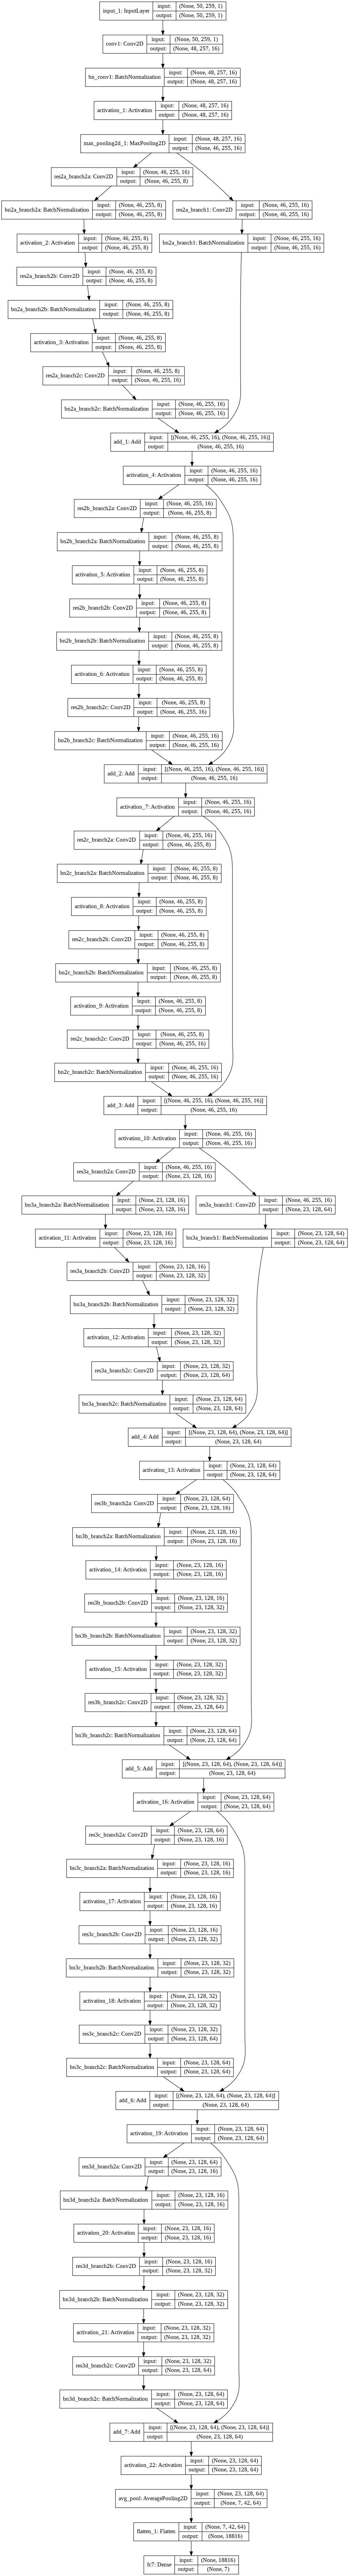

In [ ]:
from keras import losses, models, optimizers
opt=optimizers.Adam(lr=0.0001,amsgrad=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(model,show_shapes=True)

In [ ]:
 del model

In [ ]:
model_checkpoint = ModelCheckpoint('/gdrive/My Drive/Audio_files/ser2d_female_cnnnewmodel.hdf5',save_best_only=True,mode='max' ,monitor='val_accuracy',verbose=1)
history=model.fit(X_train,y_train,epochs=150,batch_size=100,verbose=1,validation_data=(X_test,y_test),shuffle=True,callbacks=[model_checkpoint])

Train on 33739 samples, validate on 8435 samples
Epoch 1/150
33739/33739 [==============================] - 47s 1ms/step - loss: 2.0738 - accuracy: 0.2025 - val_loss: 1.7179 - val_accuracy: 0.3138

Epoch 00001: val_accuracy improved from -inf to 0.31381, saving model to /gdrive/My Drive/Audio_files/ser2d_female_cnnnewmodel.hdf5
Epoch 2/150
33739/33739 [==============================] - 44s 1ms/step - loss: 1.7497 - accuracy: 0.2972 - val_loss: 1.5459 - val_accuracy: 0.3825

Epoch 00002: val_accuracy improved from 0.31381 to 0.38245, saving model to /gdrive/My Drive/Audio_files/ser2d_female_cnnnewmodel.hdf5
Epoch 3/150
33739/33739 [==============================] - 44s 1ms/step - loss: 1.5581 - accuracy: 0.3787 - val_loss: 1.3289 - val_accuracy: 0.5226

Epoch 00003: val_accuracy improved from 0.38245 to 0.52258, saving model to /gdrive/My Drive/Audio_files/ser2d_female_cnnnewmodel.hdf5
Epoch 4/150
33739/33739 [==============================] - 44s 1ms/step - loss: 1.3934 - accuracy: 0.4

In [ ]:
np.save('/gdrive/My Drive/Audio_files/female_x_train.npy',X_train)
np.save('/gdrive/My Drive/Audio_files/female_y_train.npy',y_train)
np.save('/gdrive/My Drive/Audio_files/female_x_test.npy',X_test)
np.save('/gdrive/My Drive/Audio_files/female_y_test.npy',y_test)